In [162]:
import pandas as pd
import numpy as np
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [163]:
prices = pd.read_csv('prices.csv',delimiter=';')
prices.set_index('Ticker',inplace=True)

In [164]:
sp500 = pd.read_csv('sp500daily.csv').set_index('Date')
vix = yf.Ticker('^VIX').history(period='MAX')
aapl = prices.loc['AAPL'].set_index('Date')

In [165]:
sp500 = sp500[['Open','Low','High','Close','Volume']]
aapl = aapl[['Open','Low','High','Close','Volume']]

In [166]:
sp500['Return'] = sp500['Close'].pct_change()
aapl['Return'] = aapl['Close'].pct_change()

In [167]:
sp500.head()

,Open,Low,High,Close,Volume,Return
Date,,,,,,
2010-01-04,1116.560059,1116.560059,1133.869995,1132.989990,3991400000,NaN
2010-01-05,1132.660034,1129.660034,1136.630005,1136.520020,2491020000,0.003116
2010-01-06,1135.709961,1133.949951,1139.189941,1137.140015,4972660000,0.000546
2010-01-07,1136.270020,1131.319946,1142.459961,1141.689941,5270680000,0.004001
2010-01-08,1140.520020,1136.219971,1145.390015,1144.979980,4389590000,0.002882


In [168]:
sp500['volume_ch'] = sp500['Volume'].pct_change()
sp500['hilo'] = sp500['High']/sp500['Low']-1
sp500['intraday'] = sp500['Close']/sp500['Open']-1
sp500['2dvar'] = sp500['Return'].rolling(2).std()
sp500['5dvar'] = sp500['Return'].rolling(5).std()
sp500['20dvar'] = sp500['Return'].rolling(20).std()
sp500['60dvar'] = sp500['Return'].rolling(60).std()
sp500['next_2d_var'] = sp500['2dvar'].shift(-1)
sp500['vol_next'] = sp500['next_2d_var']>sp500['2dvar']
aapl['volume_ch'] = aapl['Volume'].pct_change()
aapl['hilo'] = aapl['High']/aapl['Low']-1
aapl['intraday'] = aapl['Close']/aapl['Open']-1
aapl['2dvar'] = aapl['Return'].rolling(2).std()
aapl['5dvar'] = aapl['Return'].rolling(5).std()
aapl['20dvar'] = aapl['Return'].rolling(20).std()
aapl['60dvar'] = aapl['Return'].rolling(60).std()
aapl['next_2d_var'] = aapl['2dvar'].shift(-1)
aapl['vol_next'] = aapl['next_2d_var']>aapl['2dvar']
sp500_dataset = sp500.loc[:,'Volume':]
aapl_dataset = aapl.loc[:,'Volume':]
aapl_dataset.dropna(inplace=True)
sp500_dataset.dropna(inplace=True)

In [169]:
sp500_dataset.head()

,Volume,Return,volume_ch,hilo,intraday,2dvar,5dvar,20dvar,60dvar,next_2d_var,vol_next
Date,,,,,,,,,,,
2010-03-31,4484340000,-0.003273,0.097758,0.007540,-0.001980,0.002344,0.003392,0.004732,0.008946,0.007557,True
2010-04-01,4006870000,0.007414,-0.106475,0.009174,0.005866,0.007557,0.004360,0.004863,0.008984,0.000364,False
2010-04-05,3881620000,0.007928,-0.031259,0.007652,0.007406,0.000364,0.004937,0.004252,0.009033,0.004415,True
2010-04-06,4086180000,0.001684,0.052700,0.007635,0.002892,0.004415,0.004830,0.004220,0.009024,0.005346,True
2010-04-07,5101430000,-0.005877,0.248459,0.010491,-0.004864,0.005346,0.006195,0.004591,0.009059,0.006541,True


In [147]:
aapl_dataset.head()

,Volume,Return,hilo,intraday,2dvar,5dvar,20dvar,next_2d_var,vol_next,volume_ch
Date,,,,,,,,,,
2007-02-01,23726500,-0.009804,0.016502,-0.016234,0.006932,0.006925,0.029264,0.006932,False,-0.223962
2007-02-02,22197500,0.000000,0.016722,0.010000,0.006932,0.005943,0.028788,0.007001,True,-0.064443
2007-02-05,20673300,-0.009901,0.013333,-0.003322,0.007001,0.004983,0.028837,0.009358,True,-0.068665
2007-02-06,30871200,0.003333,0.020270,-0.003311,0.009358,0.006157,0.028837,0.014087,True,0.493288
2007-02-07,38100900,0.023256,0.033557,0.019868,0.014087,0.013570,0.021580,0.016444,True,0.234189


In [138]:
sp500_dataset.vol_next.value_counts()

False    1253
True     1242
Name: vol_next, dtype: int64

In [139]:
aapl_dataset.vol_next.value_counts()

False    1787
True     1697
Name: vol_next, dtype: int64

In [143]:
vix = vix.loc[:,:'Close']

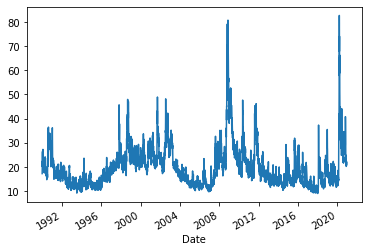

In [145]:
vix.Open.plot()

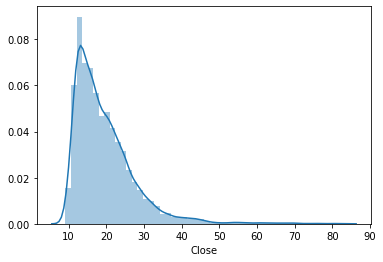

In [161]:
import seaborn as sns
sns.distplot(vix.Close)

In [170]:
sp500.to_csv('sp500.csv')
aapl.to_csv('aapl.csv')
vix.to_csv('vix.csv')
sp500_dataset.to_csv('sp500_dataset.csv')
aapl_dataset.to_csv('aapl_dataset.csv')

In [171]:
!pip install pyflux

  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-win_amd64.whl size=1250170 sha256=f28f3bc4412eafffbfa145c86734756d9ad2bac567b5fe654167abb805ba666a
  Stored in directory: c:\users\suher\appdata\local\pip\cache\wheels\d0\75\75\5e6c26d910209766f8aa4bd6940e391277eb3ec2a3501f9965
Successfully built pyflux


In [172]:
import pyflux as pf

In [173]:
a_ret = aapl_dataset.Return

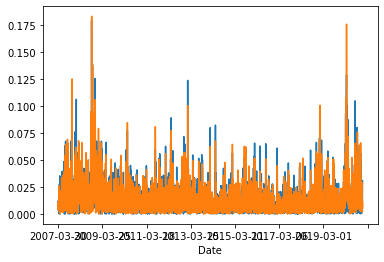

In [182]:
abs(a_ret).plot()
aapl_dataset['2dvar'].plot()

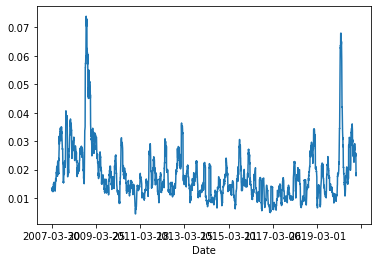

In [203]:
aapl_dataset['20dvar'].plot()

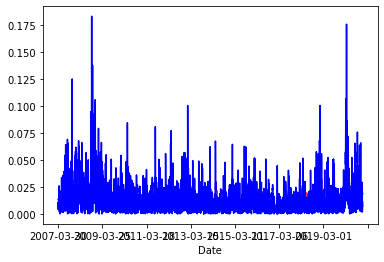

In [202]:
aapl_dataset['20dvar'].plot(c='Red')
aapl_dataset['2dvar'].plot(c='Blue')

In [181]:
aapl_dataset[['Return','2dvar']]

,Return,2dvar
Date,,
2007-03-30,-0.008955,0.010579
2007-04-02,0.006024,0.010592
2007-04-03,0.011976,0.004209
2007-04-04,-0.002959,0.010560
2007-04-05,0.002967,0.004190
...,...,...
2020-11-24,0.011594,0.029230
2020-11-25,0.007467,0.002918
2020-11-27,0.004826,0.001867
